# Part 8 Solving binary classifications using Logistic Regression

So far in the [series](https://www.javahabit.com/2019/03/02/decision-tree-using-python/) we have learnt about forms on regression models. Each of those model was used to solve a target variable that was linear number. 

Now we enter a territory where target variables might not be that straight forward. The target variables would be in the form binary, category etc. Basically anything other than a number. Ex - Cat vs Dog, Yes or No, Reg, Green or Blue. 

This form of machine learning is called Classification. One of the first algorithm in this series is called __Logistic Regression__

__Goal__ : We are provided a set of data that contains, _Gender_, _Age_, _Salary_ & _Purchased_. The goal is to predict whether the a person will make a purchase given the parameters - Age and Salary.

### Data Exploration

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [358]:
#Load the file
dataset = pd.read_csv("Social_Network_Ads.csv")

In [359]:
#View the first 5 rows
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [360]:
male= dataset[dataset['Gender']=='Male']['Gender'].size
females = dataset[dataset['Gender']=='Female']['Gender'].size



In [361]:
#Plot male vs female?
gender = ['Male', 'Female']
y_pos = np.arange(2)
gender_count = [male, females]
x_pos = [i for i, _ in enumerate(gender)] # 0,1


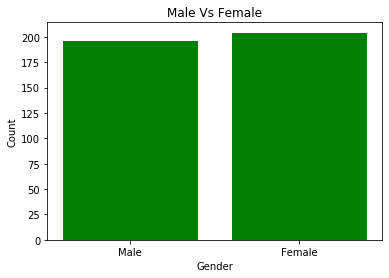

In [362]:

plt.bar(x_pos, gender_count, color='green')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Male Vs Female")

plt.xticks(x_pos, gender) ##==> ([0,1], [Male, Female])

plt.show()

In [363]:
#How many Men vs Female bought/Not Bought
men_purchase = dataset[(dataset['Purchased']==1) & (dataset['Gender']=='Male')]['Gender'].size
men_no_purchase = dataset[(dataset['Purchased']==0) & (dataset['Gender']=='Male')]['Gender'].size
female_purchase = dataset[(dataset['Purchased']==1) & (dataset['Gender']=='Female')]['Gender'].size
female_no_purchase = dataset[(dataset['Purchased']==0) & (dataset['Gender']=='Female')]['Gender'].size

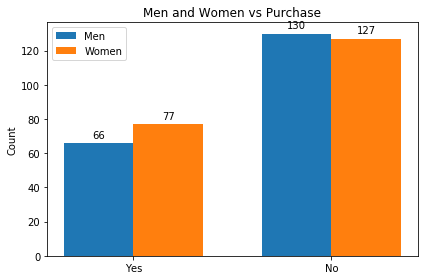

In [364]:
x_label=['Yes', 'No']
x_pos = np.arange(len(x_label))
width = 0.35
people_purchase = [men_purchase, men_no_purchase]
people_no_purchase=[female_purchase,female_no_purchase]
#All people
fig, ax = plt.subplots()
rects1 = ax.bar(x_pos - width/2, people_purchase, width, label='Men')
rects2 = ax.bar(x_pos + width/2, people_no_purchase, width, label='Women')

ax.set_ylabel('Count')
ax.set_title('Men and Women vs Purchase')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


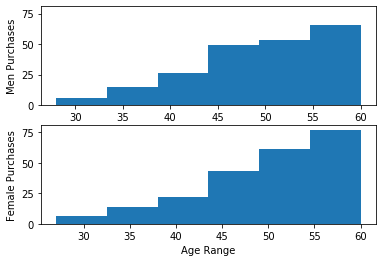

In [365]:
# What age range purchases more
men_purchased=dataset[(dataset['Purchased']==1)& (dataset['Gender']=='Male') ]['Age']
female_purchased=dataset[(dataset['Purchased']==1)& (dataset['Gender']=='Female') ]['Age']

n_bins = 6

fig, axs = plt.subplots(2,1, sharey=True)

# We can set the number of bins with the `bins` kwarg
#plt.title('Men Vs women Salary Range Purchase')
axs[0].hist(men_purchased, bins=n_bins,orientation ='vertical',cumulative=True )
axs[0].set_ylabel('Men Purchases')


axs[1].hist(female_purchased, bins=n_bins,orientation ='vertical',cumulative=True)
axs[1].set_ylabel('Female Purchases')
axs[1].set_xlabel('Age Range')
#fig.tight_layout()
plt.show()

For people who bought, it appears that Men and women shopping habit are quite different. For both men and women, they make purchases gradually until age __40__. After age __40__, both men and women tend to purchase more. After age __50__, men purchase habit drop but women continue the trend.

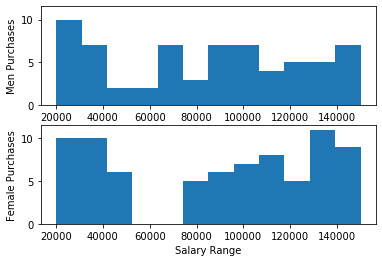

In [366]:
# What salary range purchases more
men_purchased=dataset[(dataset['Purchased']==1)& (dataset['Gender']=='Male') ]['EstimatedSalary']
female_purchased=dataset[(dataset['Purchased']==1)& (dataset['Gender']=='Female') ]['EstimatedSalary']

n_bins = 12

fig, axs = plt.subplots(2,1, sharey=True)

# We can set the number of bins with the `bins` kwarg
#plt.title('Men Vs women Salary Range Purchase')
axs[0].hist(men_purchased, bins=n_bins,orientation ='vertical' )
axs[0].set_ylabel('Men Purchases')


axs[1].hist(female_purchased, bins=n_bins,orientation ='vertical')
axs[1].set_ylabel('Female Purchases')
axs[1].set_xlabel('Salary Range')
#fig.tight_layout()
plt.show()

Salary Range purchases are more interesting. Men and women purchases keep dropping from __19000 - 50000__. Women purchases continue to increase from __75000__ and upwards. Men purchases remain pretty stale beyond __70000__ and upwards.

## Set up Training and Test Data

In [423]:
# Set up training and test data
x=dataset.iloc[:,1:4].values
y=dataset.iloc[:,4:5].values
x[1:5]

array([['Male', 35, 20000],
       ['Female', 26, 43000],
       ['Female', 27, 57000],
       ['Male', 19, 76000]], dtype=object)

The dataset has a categorical field sex = {Male, Female}. Before we proceed to train the model, let's encode the dataset.

In [424]:
#Adding the logistic regression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.compose import ColumnTransformer 

transformer = ColumnTransformer(
    transformers=[
        ("Gender",        # Just a name
         OneHotEncoder(categories='auto'), # The transformer class
         [0]            # The column(s) to be applied on.
         )
    ], remainder='passthrough'
)
    
x= transformer.fit_transform(x)
x

array([[0.0, 1.0, 19, 19000],
       [0.0, 1.0, 35, 20000],
       [1.0, 0.0, 26, 43000],
       ...,
       [1.0, 0.0, 50, 20000],
       [0.0, 1.0, 36, 33000],
       [1.0, 0.0, 49, 36000]], dtype=object)

Now you can see that __Male__ has been set to 0,1 and __Female__ as 1,0.

Next we split the data in tp train and test data. Here we are splitting into 75:25 ratio. The __random_state__ is set to 10, which means that every 10th row will be set to train and test.

In [399]:
#Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)



Next we will standardize the value across the dataset. Standardized scaling is an important step here because as you will see age range is beweent  1-100, while salary is in 1000's and sex is either 0 or 1. 

In [425]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [426]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [427]:
X_train

array([[-1.06191317,  1.06191317, -0.93894518,  0.26049952],
       [ 0.94169658, -0.94169658, -0.93894518,  0.43327002],
       [ 0.94169658, -0.94169658,  0.3177076 ,  0.05893394],
       ...,
       [-1.06191317,  1.06191317, -0.84227958,  0.2892946 ],
       [ 0.94169658, -0.94169658,  0.1243764 , -0.25781198],
       [ 0.94169658, -0.94169658,  0.4143732 ,  1.09555693]])

Now you can see that the each column has been standardized and scaled. Next we need to define our regression class.

In [428]:
lr = LogisticRegression(random_state=3, solver = 'lbfgs',\
                        multi_class='auto').fit(X_train, y_train.ravel())


In [431]:
y_pred = lr.predict(X_test)


After training our Logistics Regression, we tested it against the test data to see what are values predicted for untrained data from test. 
Next we need to see our accuracy and look at Confusion matrix

In [430]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy: \n' , accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n' ,confusion_matrix(y_test,y_pred))

Accuracy: 
 0.9
Confusion Matrix:
 [[64  5]
 [ 5 26]]


![](cf-matrix.png)


And with this we can see that our accuracy is 91% and 10 items (5 False Positive and 5 False Negative) were incorrect predictions